## Problem Set #2

MACS 30100, Dr. Evans
<br>
Due Monday, Jan. 22 at 11:30am
<br>
Liqiang Yu

### Problem 1

Some income data, lognormal distribution, and hypothesis testing

(a) Plot a histogram of percentages of the income.txt data with 30 bins.

<IPython.core.display.Javascript object>


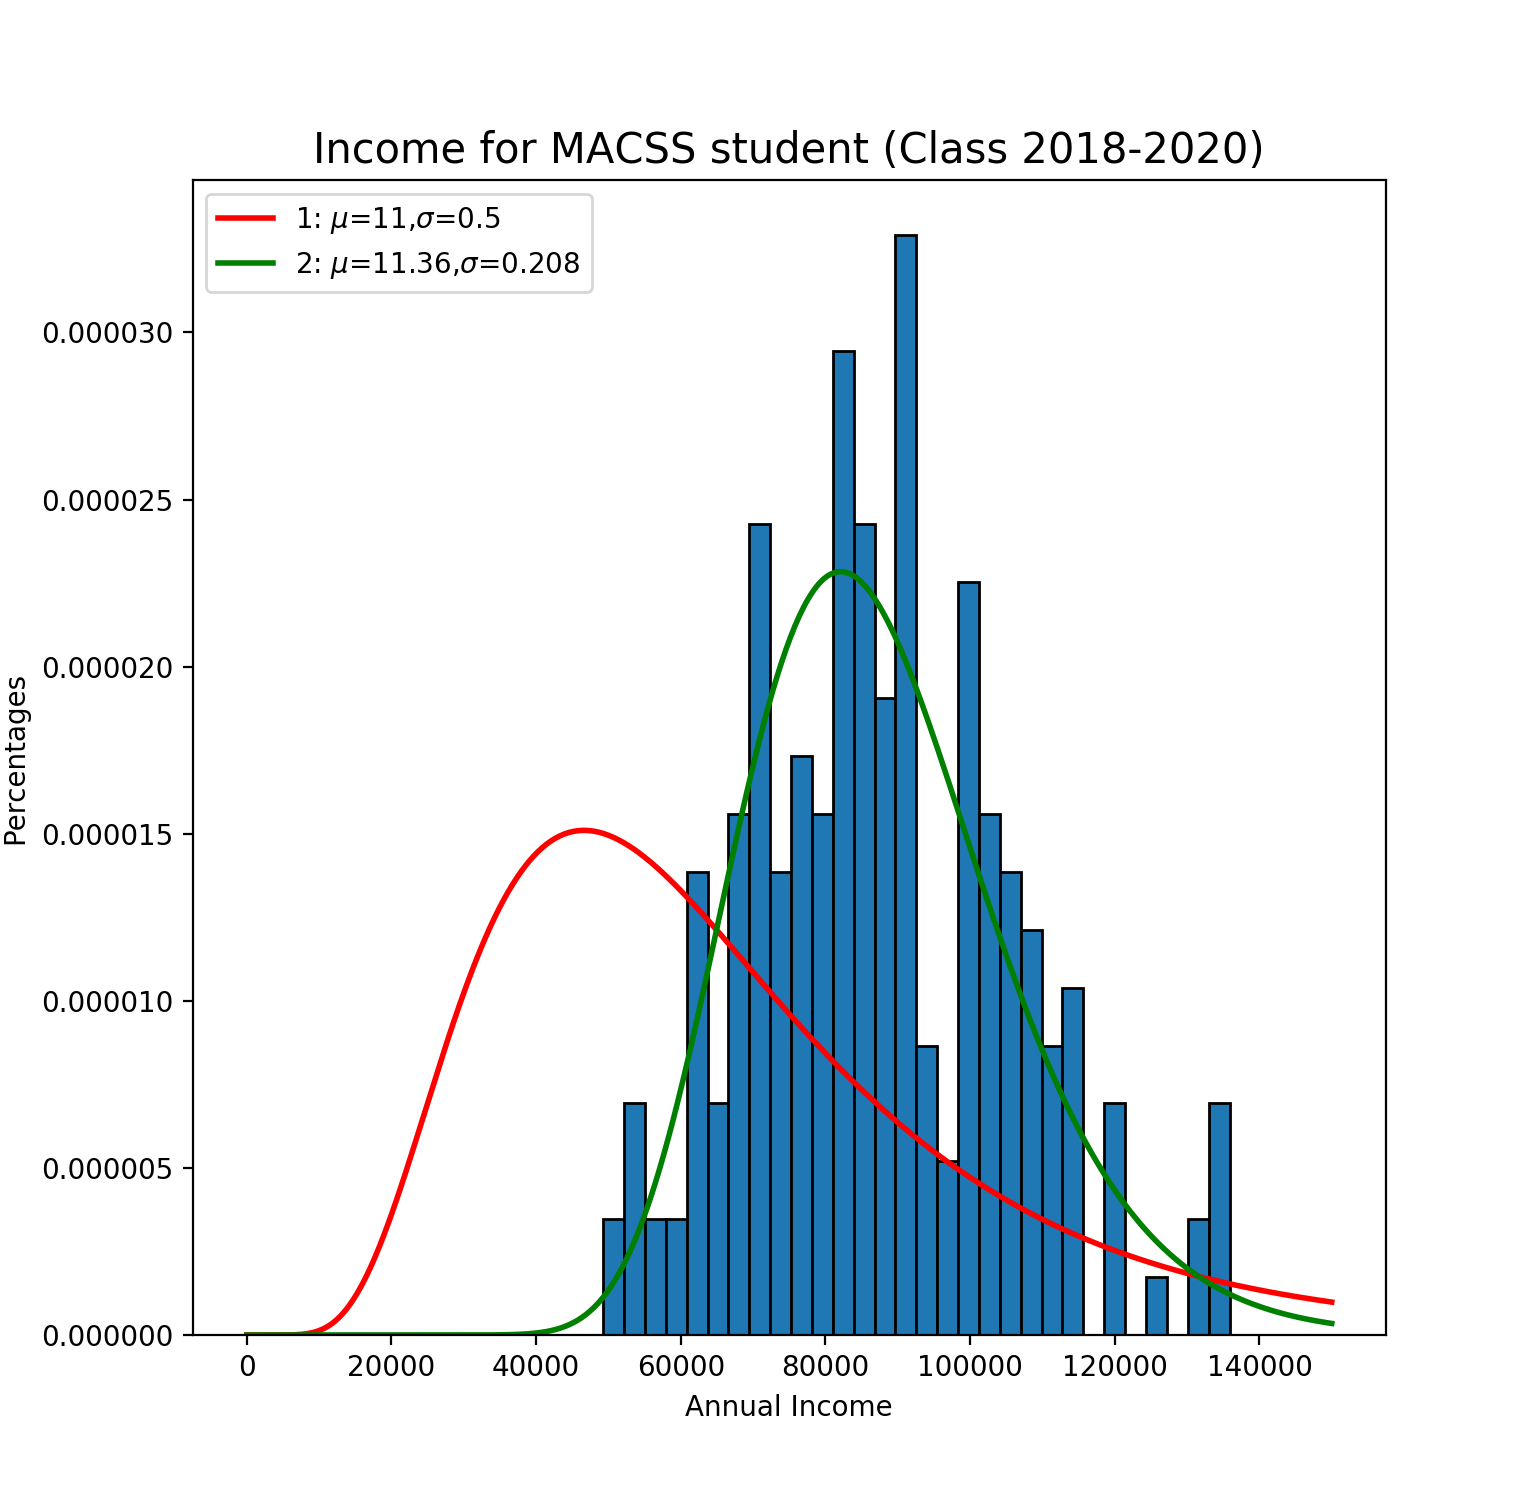

In [92]:
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt

%matplotlib notebook
fig, ax = plt.subplots(figsize=(7.7, 7.5))
income = np.loadtxt('incomes.txt')
plt.hist(income, 30, edgecolor='black',normed=True)
plt.title('Income for MACSS student (Class 2018-2020)', fontsize=15)
plt.xlabel('Annual Income')
plt.ylabel('Percentages')

The histogram is given above with bins weighted (normed = True).

(b) Plot the lognormal PDF $f(x\ |\ \mu = 11.0, \sigma = 0.5)$ for 0 ≤ $x$ ≤ 150, 000. What is the value of the log likelihood value for this parameterization of the distribution and given this data?

In [93]:
# Define function that generates values of a log normal
# probability density function (PDF)
def lgnorm_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the log normal pdf with mean mu and standard
    deviation sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals_ln = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals_ln
    --------------------------------------------------------------------
    '''
    pdf_vals_ln = (1/(xvals * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(xvals) - mu)**2 / (2 * sigma**2)))
    return pdf_vals_ln

x = np.linspace(0.001, 150000.0, 500)
mu_1, sigma_1 = 11.0, 0.5
plt.plot(x, lgnorm_pdf(x, mu_1, sigma_1), linewidth = 2, color = 'r',label='1: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

In [94]:
# Define log likelihood function for the log normal distribution
def log_lik_lgnorm(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given log normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        lgnorm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals_ln    = (N,) vector, log normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals_ln = (N,) vector, natural logarithm of log normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val_ln = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: lgnorm_pdf()
    
    RETURNS: log_lik_val_ln
    --------------------------------------------------------------------
    '''
    pdf_vals_ln = lgnorm_pdf(xvals, mu, sigma)
    ln_pdf_vals_ln = np.log(pdf_vals_ln)
    log_lik_val_ln = ln_pdf_vals_ln.sum()
    
    return log_lik_val_ln
print('Log-likelihood 1: ', log_lik_lgnorm(income, mu_1, sigma_1))

Log-likelihood 1:  -2385.85699781


The lognormal PDF curve is given in the same graph above. The value of the log likelihood value for this parameterization of the distribution and given data is -2385.85699781

(c) Estimate the parameters of the lognormal distribution by maximum likelihood and plot its PDF against the PDF from part (b) and the histogram from part (a). Plot the estimated PDF for 0 ≤ x ≤ 150, 000. Report the ML estimates for µ and σ, the value of the likelihood function, and the variance-covariance matrix.

In [95]:
def crit_ln(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 1 tuple, (xvals)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_lgnorm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val_ln = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: log_lik_lgnorm(xvals, mu, sigma)
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals = args[0]
    log_lik_val_ln = log_lik_lgnorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val_ln
    
    return neg_log_lik_val

import scipy.optimize as opt
mu_init = 11.0  # mu_2
sig_init = 0.5  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = income
results = opt.minimize(crit_ln, params_init, args=mle_args,bounds=((None,None), (0.05,None)))
mu_MLE, sig_MLE = results.x
plt.plot(x, lgnorm_pdf(x, mu_MLE, sig_MLE), linewidth = 2, color = 'g',label='2: $\mu$=11.36,$\sigma$=0.208')
plt.legend(loc='upper left')
#plt.savefig('MLEplots.png')
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('Log-likelihood 2: ', log_lik_lgnorm(income, mu_MLE, sig_MLE))

VCV(MLE) =  [[  2.14180835e-04   1.67718328e-06]
 [  1.67718328e-06   1.06950844e-04]]
Standard error for mu estimate =  0.0146349183512
Standard error for sigma estimate =  0.0103417041075
mu_MLE= 11.3590229758  sig_MLE= 0.208177325072
Log-likelihood 2:  -2241.71930136


By MLE, the parameters are: mu= 11.359023 and sig= 0.208177.
The corresponding PDF is plotted in the same graph above. The value of the log likelihood is -2241.71930136. The variance-covariance matrix is VCV(MLE) =  [[  2.14180835e-04,   1.67718328e-06][  1.67718328e-06,   1.06950844e-04]].

(d) Perform a likelihood ratio test to determine the probability that the data in incomes.txt came from the distribution in part (b).

In [96]:
log_lik_h0 = log_lik_lgnorm(income, mu_1, sigma_1)
log_lik_mle = log_lik_lgnorm(income, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


The probability is 0. So we reject the null hypothesis at 0.05 level, i.e., the income data is unlikely to have hte distribution in part b.

(e)With your estimated distribution of incomes for Chicago MACSS students from part (c), you now have a model for what your own income might look like when you graduate. Using that estimated model from part (c), What is the probability that you will earn more than \$100,000? What is the probability that you will earn less than \$75,000?

In [97]:
# Define function that generates values of a log normal
# cumulative distribution function (CDF)
def lgnorm_cdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Generate cdf values from the log normal pdf with mean mu and standard
    deviation sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = scalar, the point we want to calculate the CDF at
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: 
    sts.norm.cdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    cdf_vals_ln = scalar, CDF values for mu and sigma
               corresponding to xvals
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: cdf_vals_ln
    --------------------------------------------------------------------
    '''
    cdf_vals_ln = sts.norm.cdf(np.log(xvals), loc = mu, scale = sigma)
    
    return cdf_vals_ln

print('Prob that a student will earn more than $100,000:', 1-lgnorm_cdf(100000, mu_MLE, sig_MLE))
print('Prob that a student will earn less than $75,000:', lgnorm_cdf(75000, mu_MLE, sig_MLE))

Prob that a student will earn more than $100,000: 0.229866809603
Prob that a student will earn less than $75,000: 0.260234305743


So the probability of earning more than \$100,000 is 23% and the probability of earning less than \$75,000 is 26%.

<IPython.core.display.Javascript object>


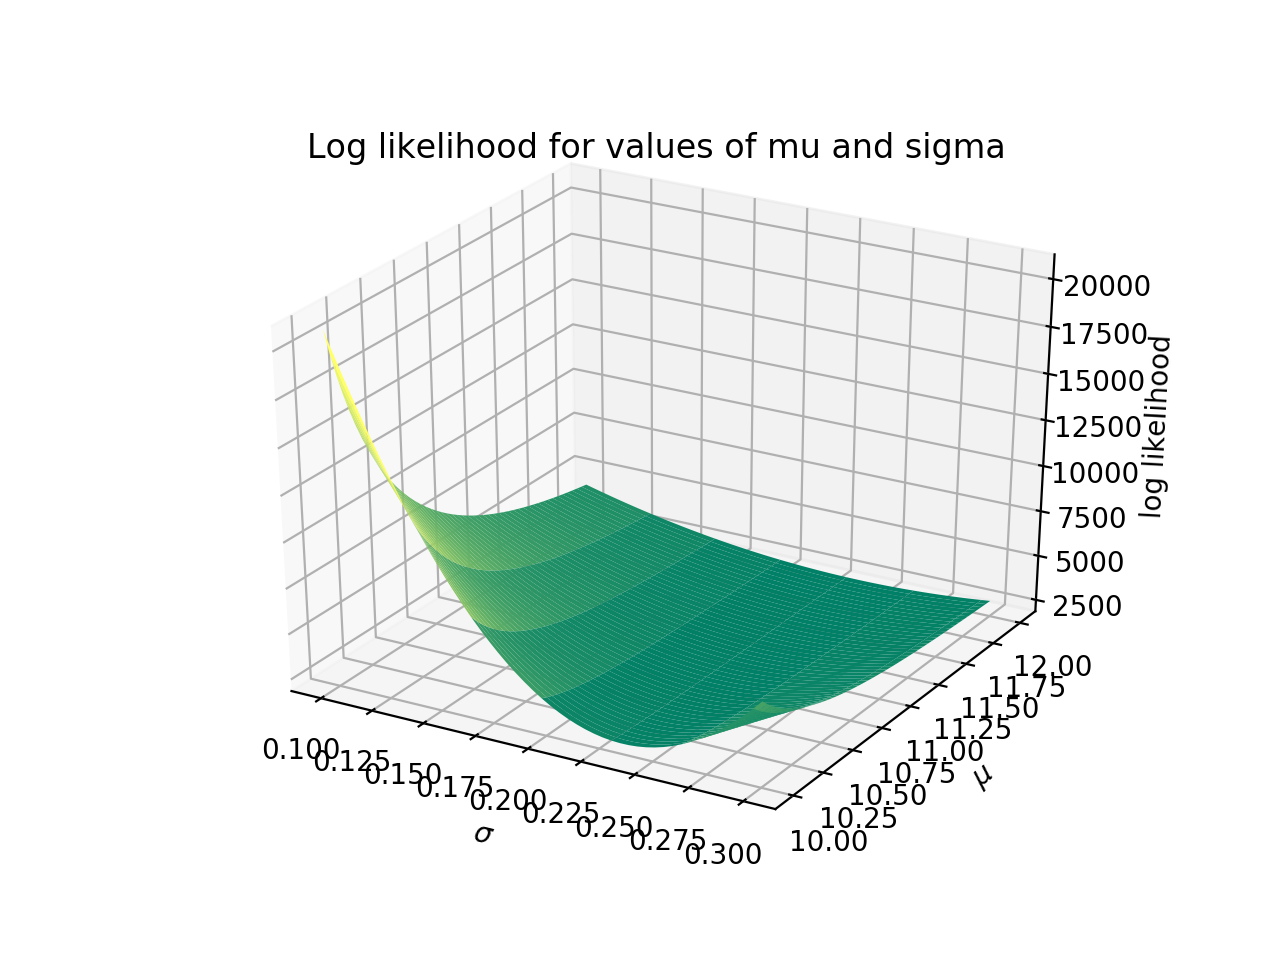

In [98]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

mu_vals = np.linspace(10, 12, 50)
sig_vals = np.linspace(0.1, 0.3, 50)
lnlik_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        lnlik_vals[mu_ind, sig_ind] = - log_lik_lgnorm(income, mu_vals[mu_ind],
                                                        sig_vals[sig_ind])

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Log likelihood for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')

### Problem 2

(a) Estimate the parameters of the model ($\beta$ 0 , $\beta$ 1 , $\beta$ 2 , $\beta$ 3 , $\beta$ 2 ) by maximum likelihood using the fact that each error term ε i is distributed normally N(0, $\sigma$ 2).

In [99]:
sick = np.loadtxt("sick.txt", skiprows = 1,delimiter  = ',')

In [100]:
sick_week = sick[:,0]
sick_age = sick[:,1]
sick_children = sick[:,2]
sick_avg_tem = sick[:,3]

In [110]:
def crit_LR(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (5,) vector, ([beta_i, sigma]) i=0..3
    beta_i     = scalar, coefficients of linear regression model
    sigma = the stdev of the error term in linear regression
    args   = length 4 tuple, (s_week, s_age, s_children, s_avg_tem)
    s_week  = (N,) vector, values of the denpendent variable
    s_* = (N,) vector, values of the indenpendent variables
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    xvals = (N,) vector, residuals of given coefficients and data
    log_lik_val = scalar, log likelihood value of the whole given data, sigma
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    beta_0, beta_1, beta_2, beta_3, sigma = params
    s_week, s_age, s_children, s_avg_tem = args
    n = len(s_week)
    sigma2 = sigma * sigma
    xvals = s_week - beta_0 - beta_1 * s_age - beta_2 * s_children - beta_3 * s_avg_tem
    log_lik_val = -n/2*np.log(2*np.pi*sigma2) - 1/(2*sigma2)*(xvals).T @ (xvals)
    neg_log_lik_val = -log_lik_val
                         
    return neg_log_lik_val

def log_lik(xvals, mu, sigma):
    pdf_vals = sts.norm.pdf(xvals, loc = mu, scale = sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [114]:
b_0 = 0 
b_1 = 1
b_2 = 1 
b_3 = 1
sig_0 = 1
params_0 = np.array([b_0, b_1, b_2, b_3, sig_0])
LR_args = (sick_week, sick_age, sick_children, sick_avg_tem)
result_2 = opt.minimize(crit_LR, params_0, args=LR_args, method = 'BFGS')
b_0_LR, b_1_LR, b_2_LR, b_3_LR, sig_0_LR = result_2.x
sig_0_LR = np.absolute(sig_0_LR)

res = sick_week - b_0_LR - b_1_LR * sick_age - b_2_LR * sick_children - b_3_LR * sick_avg_tem

h_inv = result_2.hess_inv
OffDiagNeg = -np.ones(h_inv.shape) + np.eye(h_inv.shape[0])*2
print("Parameters are:", b_0_LR, b_1_LR, b_2_LR, b_3_LR,sig_0_LR*sig_0_LR)
print("The value of the log likelihood function", log_lik(res, 0, sig_0_LR))
print("The estimated variance covariance matrix is:", result_2.hess_inv)

Parameters are: 0.251646509586 0.012933358644 0.400501961516 -0.00999167988293 9.1066121133e-06
The value of the log likelihood function 876.865046416
The estimated variance covariance matrix is: [[  9.12470365e-07   1.02530882e-08  -1.89506512e-07  -2.18508669e-08
    1.55861586e-10]
 [  1.02530882e-08   3.94922063e-09  -3.55527302e-08  -2.52882105e-09
    1.04878286e-10]
 [ -1.89506512e-07  -3.55527302e-08   3.64039215e-07   2.32842125e-08
   -1.77953142e-09]
 [ -2.18508669e-08  -2.52882105e-09   2.32842125e-08   1.94263225e-09
   -5.09863880e-11]
 [  1.55861586e-10   1.04878286e-10  -1.77953142e-09  -5.09863880e-11
    2.02777223e-08]]


The estimated parameters are $\beta_0$ = 0.2516, $\beta_1$ = 0.0129, $\beta_2$ = 0.4005, $\beta_3$ = -0.0099 and $\sigma^2$ = 9.1e-06. 
The value of the log likelihood function is 876.86. The estimated variance covariance matrix is listed above (corresponding to the result given by R).

(b) Use a likelihood ratio test to determine the probability that $\beta_0$ = 1.0, $\sigma^2$  = 0.01 and $\beta_1$ , $\beta_2$ , $\beta_3$ = 0. That is, what is the likelihood that age, number of children, and average winter temperature have no eﬀect on the number of sick days?

In [120]:

res_2 = sick_week - 1 

log_lik_h0_2 = log_lik(res_2, 0, 0.1)
log_lik_mle_2 = log_lik(res, 0, sig_0_LR)
LR_val_2 = 2 * (log_lik_mle_2 - log_lik_h0_2)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val_2, 5)

print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 5 degrees of freedom p-value =  0.0


So we reject the null hypothesis that $\beta_0$ = 1.0, $\sigma^2$  = 0.01 and $\beta_1$ , $\beta_2$ , $\beta_3$ = 0.